In [1]:
import pandas as pd


In [2]:
# Load the dataset
df = pd.read_csv('train.csv')


In [3]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Fill missing values for 'Age' with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

In [5]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Fill missing values for 'Embarked' with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [7]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [8]:
# Drop rows with missing 'Cabin' 
df.drop(columns=['Cabin'], inplace=True)


#Create New Columns

In [9]:
# Create a new column 'FamilySize' based on 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [10]:
# Create Age categories
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])

Filter Data

In [11]:
# Filter passengers who survived
survived_df = df[df['Survived'] == 1]

In [12]:
# Filter female passengers in first class
female_first_class = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]

In [13]:
# Filter passengers based on Age category 'Adult'
adults_df = df[df['AgeCategory'] == 'Adult']

In [14]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize AgeCategory  
0      0         A/5 21171   7.2500        S           2       Adult  
1      0          PC 17599  71.2833        C           2  Middle Age  
2      0  STON/O2. 3101282   7.9250        S           1       Adult  
3      0            113803  53.1000 

In [15]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.904602  
std      0.806057   49.693429    1.613459  
min      0.000000    0.000000    1.000000  
25%      0.000000    7.910400    1.000000  
50%      0.000000   14.454200    1.000000  
75%      0.000000   31.000000    2.000000  
max      6.000000


Visualize the Dataset

In [16]:
import matplotlib.pyplot as plt

In [17]:
# Calculate survival rate by gender
survival_by_gender = df.groupby('Sex')['Survived'].mean()

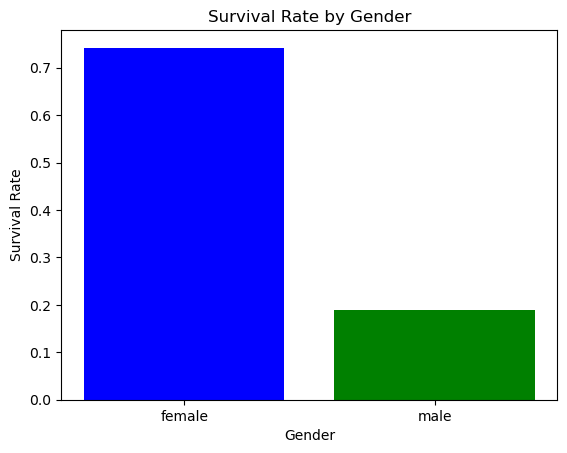

In [18]:
# Plot
plt.bar(survival_by_gender.index, survival_by_gender.values, color=['blue', 'Green'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

Histogram of Age Distribution

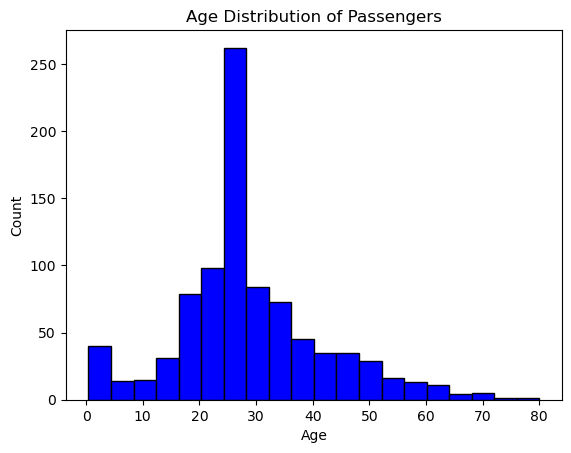

In [19]:
# Plot the histogram for age distribution
plt.hist(df['Age'].dropna(), bins=20, color='Blue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [20]:
# Calculate survival rate by Age Category
survival_by_age_cat = df.groupby('AgeCategory')['Survived'].mean()

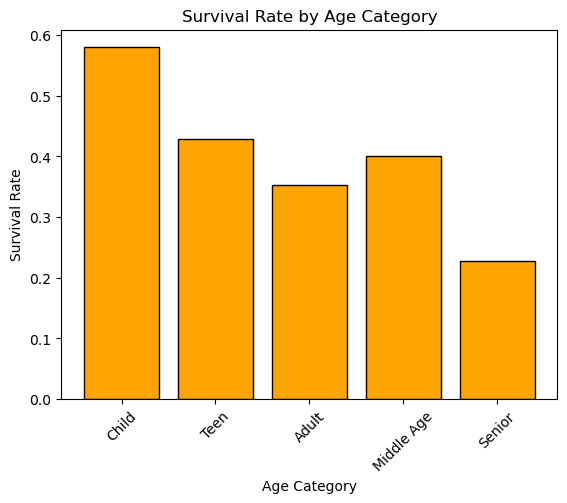

In [21]:
plt.bar(survival_by_age_cat.index, survival_by_age_cat.values, color='orange', edgecolor='black')
plt.title('Survival Rate by Age Category')
plt.ylabel('Survival Rate')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.show()
